In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv(r'/Users/jakubptak/Desktop/iris.csv')

In [3]:
#SUPERVISED LEARNING, THUS WE SEPARATE LABELS FROM DATA
X = df.iloc[:, :-1]  
Y = df.iloc[:, -1]   

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage



def perform_kmeans(X, n_clusters, random_state=25):
    start_time = time.time()
    mem_before = memory_usage()[0]  

    k_means = KMeans(random_state=random_state, n_clusters=n_clusters)
    k_means.fit(X)
    cluster = k_means.predict(X)

    mem_after = memory_usage()[0]  
    elapsed_time = time.time() - start_time

    return cluster, elapsed_time, mem_after - mem_before


cluster, elapsed_time, memory_diff = perform_kmeans(X, n_clusters=3)



Adjusted Rand Index (ARI): 0.73
The average Silhouette Score: 0.55
Clustering Time: 0.2142 seconds
Memory Used: 0.25 MB


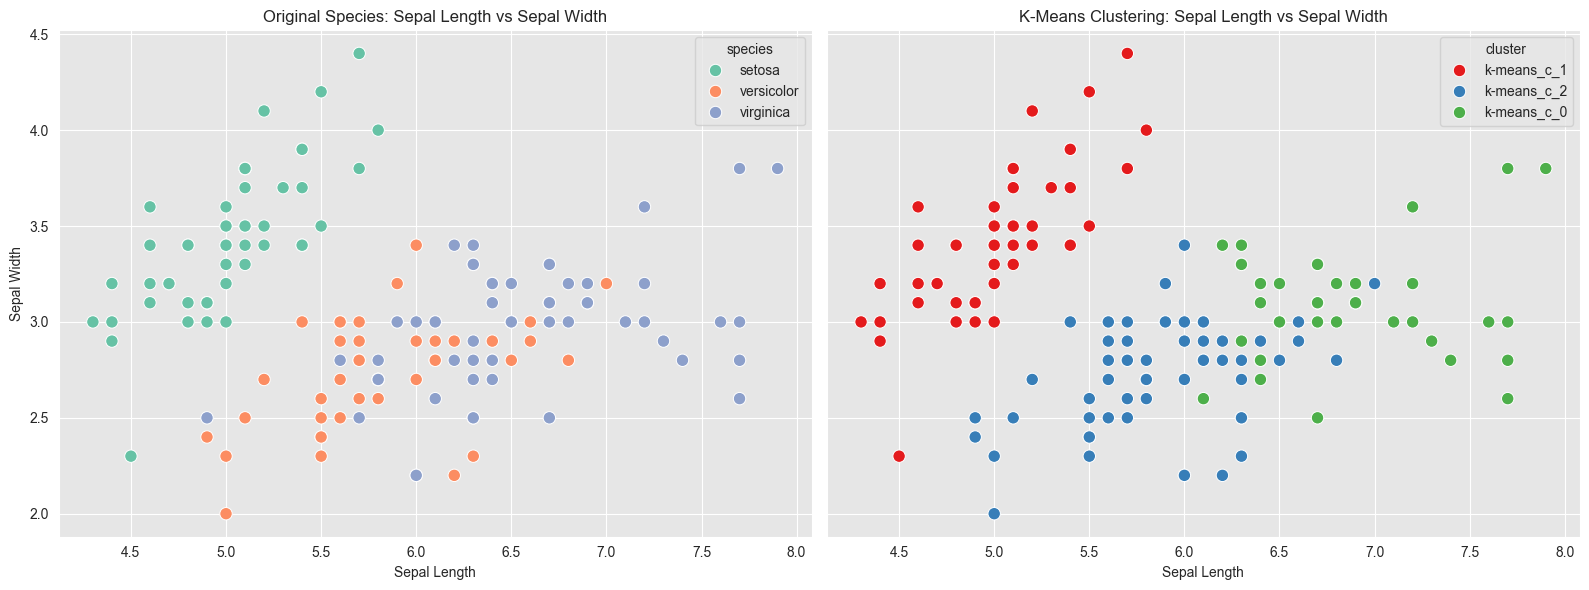

In [ ]:
df['cluster'] = ['k-means_c_' + str(c) for c in cluster]
silhouette_avg = silhouette_score(X, df['cluster'])
ari = adjusted_rand_score(Y, cluster)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print(f"The average Silhouette Score: {silhouette_avg:.2f}")
print(f"Clustering Time: {elapsed_time:.4f} seconds")
print(f"Memory Used: {memory_diff:.2f} MB")

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.scatterplot(
    x=df['sepal_length'], y=df['sepal_width'], hue=df['species'],
    ax=axes[0], palette='Set2', s=80
)
axes[0].set(title='Original Species: Sepal Length vs Sepal Width', xlabel='Sepal Length', ylabel='Sepal Width')

sns.scatterplot(
    x=df['sepal_length'], y=df['sepal_width'], hue=df['cluster'],
    ax=axes[1], palette='Set1', s=80
)
axes[1].set(title='K-Means Clustering: Sepal Length vs Sepal Width', xlabel='Sepal Length', ylabel='')

plt.tight_layout()
plt.show()

LAPLACIAN METHODS

In [ ]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse
from scipy import linalg

def spectral_clustering_analysis(df, Y, nn=8, n_clusters=3, random_state=25):
    start_time = time.time()
    mem_before = memory_usage()[0]  
    # Generate graph Laplacian
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    # Compute eigenvalues and eigenvectors
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    # Project onto first few eigenvectors
    eigenvals_sorted_indices = np.argsort(eigenvals)
    indices = eigenvals_sorted_indices[:3]
    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])
    proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
    # Perform K-Means clustering
    k_means = KMeans(random_state=random_state, n_clusters=n_clusters)
    k_means.fit(proj_df)
    cluster = k_means.predict(proj_df)
    mem_after = memory_usage()[0]  # Memory after computations
    elapsed_time = time.time() - start_time
    return cluster, elapsed_time, mem_after - mem_before,eigenvals_sorted_indices


cluster, elapsed_time, memory_diff,indices = spectral_clustering_analysis(X, Y, nn=8, n_clusters=3, random_state=25)



    

Adjusted Rand Index (ARI): 0.76
The average Silhouette Score: 0.55
Clustering Time: 0.2596 seconds
Memory Used: 0.36 MB


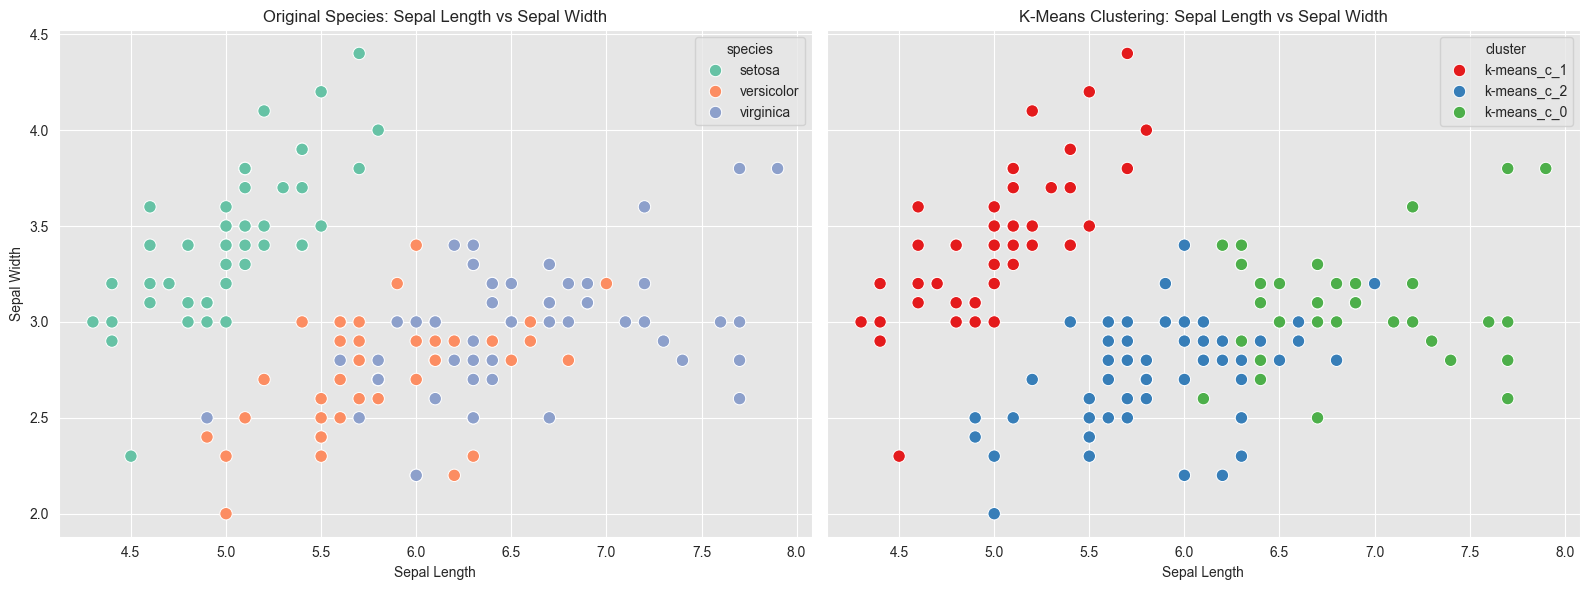

In [ ]:
df['cluster'] = ['k-means_c_' + str(c) for c in cluster]
silhouette_avg = silhouette_score(X, df['cluster'])
ari = adjusted_rand_score(Y, cluster)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print(f"The average Silhouette Score: {silhouette_avg:.2f}")
print(f"Clustering Time: {elapsed_time:.4f} seconds")
print(f"Memory Used: {memory_diff:.2f} MB")

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.scatterplot(
    x=df['sepal_length'], y=df['sepal_width'], hue=df['species'],
    ax=axes[0], palette='Set2', s=80
)
axes[0].set(title='Original Species: Sepal Length vs Sepal Width', xlabel='Sepal Length', ylabel='Sepal Width')

sns.scatterplot(
    x=df['sepal_length'], y=df['sepal_width'], hue=df['cluster'],
    ax=axes[1], palette='Set1', s=80
)
axes[1].set(title='K-Means Clustering: Sepal Length vs Sepal Width', xlabel='Sepal Length', ylabel='')

plt.tight_layout()
plt.show()

Normalized Spectral Clustering 

In [ ]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse
from scipy import linalg

def spectral_clustering_analysis(df, Y, nn=8, n_clusters=3, random_state=25):
    start_time = time.time()
    mem_before = memory_usage()[0]  
    # Generate graph Laplacian
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=True)
    graph_laplacian = graph_laplacian_s.toarray()
    # Compute eigenvalues and eigenvectors
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    # Project onto first few eigenvectors
    eigenvals_sorted_indices = np.argsort(eigenvals)
    indices = eigenvals_sorted_indices[:3]
    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])
    proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
    # Perform K-Means clustering
    k_means = KMeans(random_state=random_state, n_clusters=n_clusters)
    k_means.fit(proj_df)
    cluster = k_means.predict(proj_df)
    mem_after = memory_usage()[0]  # Memory after computations
    elapsed_time = time.time() - start_time
    return cluster, elapsed_time, mem_after - mem_before


cluster, elapsed_time, memory_diff = spectral_clustering_analysis(X, Y, nn=8, n_clusters=3, random_state=25)



    

Adjusted Rand Index (ARI): 0.76
The average Silhouette Score: 0.55
Clustering Time: 0.2594 seconds
Memory Used: 1.79 MB


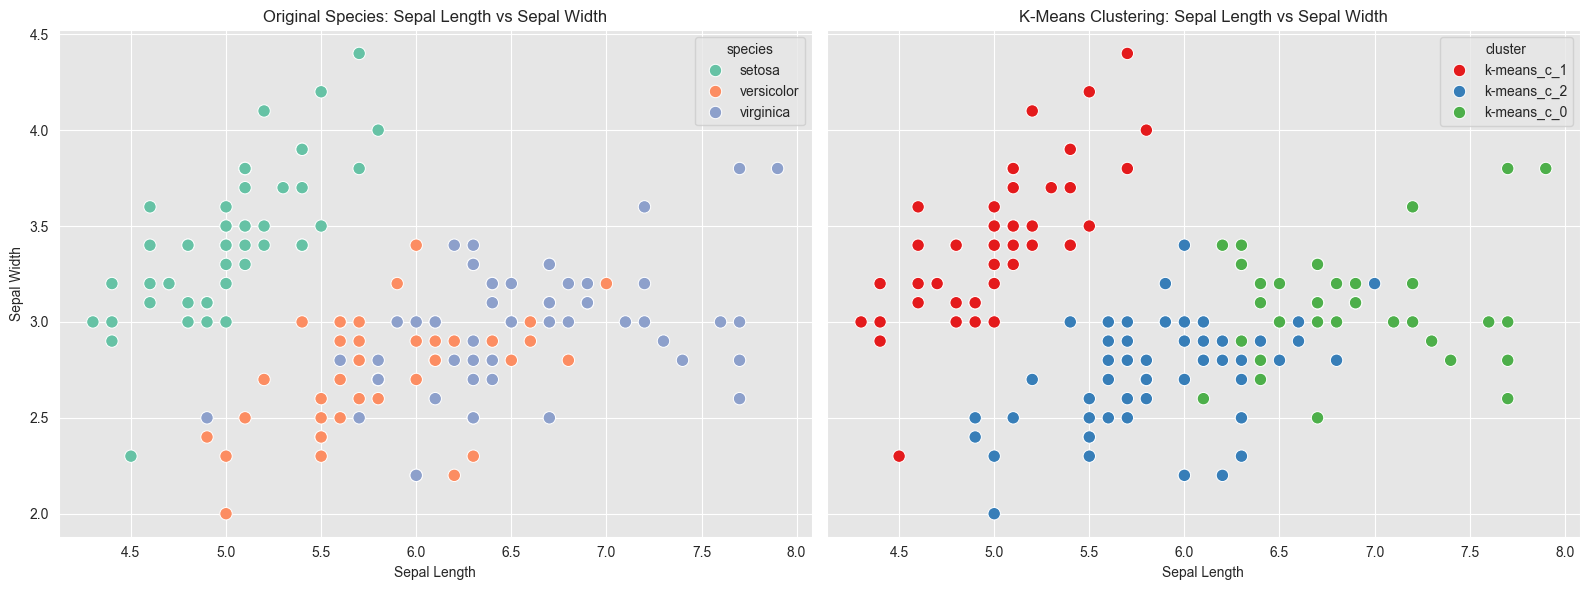

In [ ]:
df['cluster'] = ['k-means_c_' + str(c) for c in cluster]
silhouette_avg = silhouette_score(X, df['cluster'])
ari = adjusted_rand_score(Y, cluster)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print(f"The average Silhouette Score: {silhouette_avg:.2f}")
print(f"Clustering Time: {elapsed_time:.4f} seconds")
print(f"Memory Used: {memory_diff:.2f} MB")

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.scatterplot(
    x=df['sepal_length'], y=df['sepal_width'], hue=df['species'],
    ax=axes[0], palette='Set2', s=80
)
axes[0].set(title='Original Species: Sepal Length vs Sepal Width', xlabel='Sepal Length', ylabel='Sepal Width')

sns.scatterplot(
    x=df['sepal_length'], y=df['sepal_width'], hue=df['cluster'],
    ax=axes[1], palette='Set1', s=80
)
axes[1].set(title='K-Means Clustering: Sepal Length vs Sepal Width', xlabel='Sepal Length', ylabel='')

plt.tight_layout()
plt.show()

NEW DATASET

In [6]:
df = df = pd.read_csv(r'/Users/jakubptak/Desktop/ECGCvdata.csv')
df = df.sample(frac=1) 
len(df)       

1200

In [9]:
# Display dataset information
print("\nDataset Information:")
print(df.info())

# Display first few rows
print("\nFirst Five Rows of the Dataset:")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Species distribution
print("\nSpecies Count:")
print(df.iloc[:, -1].value_counts())

# Set style for seaborn plots
sns.set(style="whitegrid")

# Show all plots in one window
plt.show()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 915 to 635
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RECORD      1200 non-null   int64  
 1   hbpermin    1200 non-null   float64
 2   Pseg        1200 non-null   float64
 3   PQseg       1200 non-null   float64
 4   QRSseg      1200 non-null   float64
 5   QRseg       1200 non-null   float64
 6   QTseg       1200 non-null   float64
 7   RSseg       1200 non-null   float64
 8   STseg       1200 non-null   float64
 9   Tseg        1200 non-null   float64
 10  PTseg       1200 non-null   float64
 11  ECGseg      1200 non-null   float64
 12  QRtoQSdur   431 non-null    float64
 13  RStoQSdur   431 non-null    float64
 14  RRmean      1200 non-null   float64
 15  PPmean      1200 non-null   float64
 16  PQdis       1200 non-null   float64
 17  PonQdis     1200 non-null   float64
 18  PRdis       1200 non-null   float64
 19  PonRdis  

In [244]:
pd.set_option('display.max_columns', None)
df.head()

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,ECGseg,QRtoQSdur,RStoQSdur,RRmean,PPmean,PQdis,PonQdis,PRdis,PonRdis,PSdis,PonSdis,PTdis,PonTdis,PToffdis,QRdis,QSdis,QTdis,QToffdis,RSdis,RTdis,RToffdis,STdis,SToffdis,PonToffdis,PonPQang,PQRang,QRSang,RSTang,STToffang,RRTot,NNTot,SDRR,IBIM,IBISD,SDSD,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
257,258,107.142857,0.075427,0.091132,0.094498,0.047650,0.193002,0.046848,0.098504,0.089316,0.284135,0.362179,NaN,NaN,200.061224,200.061224,32.153912,45.330143,49.314351,62.495911,66.190850,79.369730,101.653277,114.836833,116.122874,17.213936,34.041134,69.513961,83.981416,16.930210,52.352091,66.822105,35.476878,49.941826,129.306129,2.283371,NaN,NaN,NaN,1.85723,50,51,28.323502,199.901961,28.039279,47.982740,202.056216,23.484726,68.185281,-0.024920,NaN,NaN,0.020014,5,9.803922,ARR
1102,1103,93.696000,0.050448,0.061690,0.017340,0.008765,0.118807,0.008575,0.101467,0.097370,0.180497,0.226181,NaN,NaN,81.933884,81.933884,7.056665,9.292612,7.161735,9.398736,7.203218,9.440220,20.707534,23.016629,23.376937,0.109726,0.148789,13.795287,16.459254,0.043368,13.687863,16.351926,13.646711,16.310529,25.686108,NaN,NaN,NaN,NaN,NaN,122,163,3.997387,76.779141,5.637511,2.367825,82.031338,0.077534,0.301883,-0.188594,NaN,NaN,0.062962,1,0.613497,NSR
923,924,85.333333,0.050944,0.060059,0.034180,0.018229,0.123047,0.015951,0.088867,0.074002,0.183105,0.225043,NaN,NaN,89.396396,89.531532,7.248597,9.313953,9.116401,11.184327,10.683156,12.751023,22.689997,24.811048,24.870356,1.887596,3.442494,15.551089,17.728860,1.573796,13.677544,15.855159,12.109138,14.286762,26.991236,NaN,NaN,NaN,NaN,NaN,112,143,23.683453,87.517483,21.005101,5.028390,92.480385,1.171241,6.903886,-0.157050,NaN,NaN,0.050647,2,1.398601,NSR
638,639,103.087649,0.061827,0.059062,0.012938,0.006568,0.114765,0.006370,0.101827,0.151802,0.173827,0.287654,NaN,NaN,142.132353,142.132353,13.460149,20.725657,13.842415,21.108070,14.224842,21.490385,40.309765,47.588285,63.088843,0.382985,0.764734,26.871407,49.649222,0.383356,26.489075,49.266960,26.106912,48.884583,70.367674,NaN,NaN,NaN,NaN,NaN,69,80,14.493309,140.000000,13.591229,19.394763,142.869387,0.313856,1.531075,-0.052463,NaN,NaN,0.016781,6,7.500000,CHF
912,913,104.380952,0.055568,0.063600,0.079831,0.040658,0.170390,0.039173,0.090559,0.079831,0.233990,0.298415,NaN,NaN,73.330882,73.338235,8.068286,11.347805,13.238911,16.522434,18.243976,21.526471,29.993005,33.279515,34.993178,5.225024,10.184380,21.945365,26.943669,5.046838,16.771071,21.769959,11.762129,16.759666,38.279572,NaN,NaN,NaN,NaN,NaN,137,141,23.744366,73.148936,23.403390,29.092130,77.079266,3.884461,20.456242,-0.062871,NaN,NaN,0.026973,1,0.709220,NSR


In [245]:
columns_to_fill = ['QRtoQSdur', 'RStoQSdur', 'PonPQang', 'PQRang', 'QRSang', 'RSTang', 'STToffang', 'QRslope', 'RSslope']

# Fill NaN values with the mean of the corresponding ECG_signal group
df[columns_to_fill] = df.groupby('ECG_signal')[columns_to_fill].transform(lambda x: x.fillna(x.mean()))


In [246]:
#SUPERVISED LEARNING, THUS WE SEPARATE LABELS FROM DATA
X = df.iloc[:, 1:-1]  
Y = df.iloc[:, -1]   
X.head()

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,ECGseg,QRtoQSdur,RStoQSdur,RRmean,PPmean,PQdis,PonQdis,PRdis,PonRdis,PSdis,PonSdis,PTdis,PonTdis,PToffdis,QRdis,QSdis,QTdis,QToffdis,RSdis,RTdis,RToffdis,STdis,SToffdis,PonToffdis,PonPQang,PQRang,QRSang,RSTang,STToffang,RRTot,NNTot,SDRR,IBIM,IBISD,SDSD,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50
257,107.142857,0.075427,0.091132,0.094498,0.047650,0.193002,0.046848,0.098504,0.089316,0.284135,0.362179,0.001401,0.001377,200.061224,200.061224,32.153912,45.330143,49.314351,62.495911,66.190850,79.369730,101.653277,114.836833,116.122874,17.213936,34.041134,69.513961,83.981416,16.930210,52.352091,66.822105,35.476878,49.941826,129.306129,2.283371,-5.403928,8.975630,-5.850601,1.857230,50,51,28.323502,199.901961,28.039279,47.982740,202.056216,23.484726,68.185281,-0.024920,0.076143,-0.080868,0.020014,5,9.803922
1102,93.696000,0.050448,0.061690,0.017340,0.008765,0.118807,0.008575,0.101467,0.097370,0.180497,0.226181,0.003928,0.003884,81.933884,81.933884,7.056665,9.292612,7.161735,9.398736,7.203218,9.440220,20.707534,23.016629,23.376937,0.109726,0.148789,13.795287,16.459254,0.043368,13.687863,16.351926,13.646711,16.310529,25.686108,13.633136,-16.657092,27.763554,-18.840351,6.149218,122,163,3.997387,76.779141,5.637511,2.367825,82.031338,0.077534,0.301883,-0.188594,0.240361,-0.254237,0.062962,1,0.613497
923,85.333333,0.050944,0.060059,0.034180,0.018229,0.123047,0.015951,0.088867,0.074002,0.183105,0.225043,0.003928,0.003884,89.396396,89.531532,7.248597,9.313953,9.116401,11.184327,10.683156,12.751023,22.689997,24.811048,24.870356,1.887596,3.442494,15.551089,17.728860,1.573796,13.677544,15.855159,12.109138,14.286762,26.991236,13.633136,-16.657092,27.763554,-18.840351,6.149218,112,143,23.683453,87.517483,21.005101,5.028390,92.480385,1.171241,6.903886,-0.157050,0.240361,-0.254237,0.050647,2,1.398601
638,103.087649,0.061827,0.059062,0.012938,0.006568,0.114765,0.006370,0.101827,0.151802,0.173827,0.287654,0.002036,0.001964,142.132353,142.132353,13.460149,20.725657,13.842415,21.108070,14.224842,21.490385,40.309765,47.588285,63.088843,0.382985,0.764734,26.871407,49.649222,0.383356,26.489075,49.266960,26.106912,48.884583,70.367674,8.641565,-7.498753,12.034652,-8.569276,3.454150,69,80,14.493309,140.000000,13.591229,19.394763,142.869387,0.313856,1.531075,-0.052463,0.100814,-0.110110,0.016781,6,7.500000
912,104.380952,0.055568,0.063600,0.079831,0.040658,0.170390,0.039173,0.090559,0.079831,0.233990,0.298415,0.003928,0.003884,73.330882,73.338235,8.068286,11.347805,13.238911,16.522434,18.243976,21.526471,29.993005,33.279515,34.993178,5.225024,10.184380,21.945365,26.943669,5.046838,16.771071,21.769959,11.762129,16.759666,38.279572,13.633136,-16.657092,27.763554,-18.840351,6.149218,137,141,23.744366,73.148936,23.403390,29.092130,77.079266,3.884461,20.456242,-0.062871,0.240361,-0.254237,0.026973,1,0.709220


In [247]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage



def perform_kmeans(X, n_clusters, random_state=25):
    start_time = time.time()
    mem_before = memory_usage()[0]  

    k_means = KMeans(random_state=random_state, n_clusters=n_clusters)
    k_means.fit(X)
    cluster = k_means.predict(X)

    mem_after = memory_usage()[0]  
    elapsed_time = time.time() - start_time

    return cluster, elapsed_time, mem_after - mem_before


cluster, elapsed_time, memory_diff = perform_kmeans(X, n_clusters=4)


Adjusted Rand Index (ARI): 0.37
The average Silhouette Score: 0.37
Clustering Time: 0.2141 seconds
Memory Used: 0.67 MB


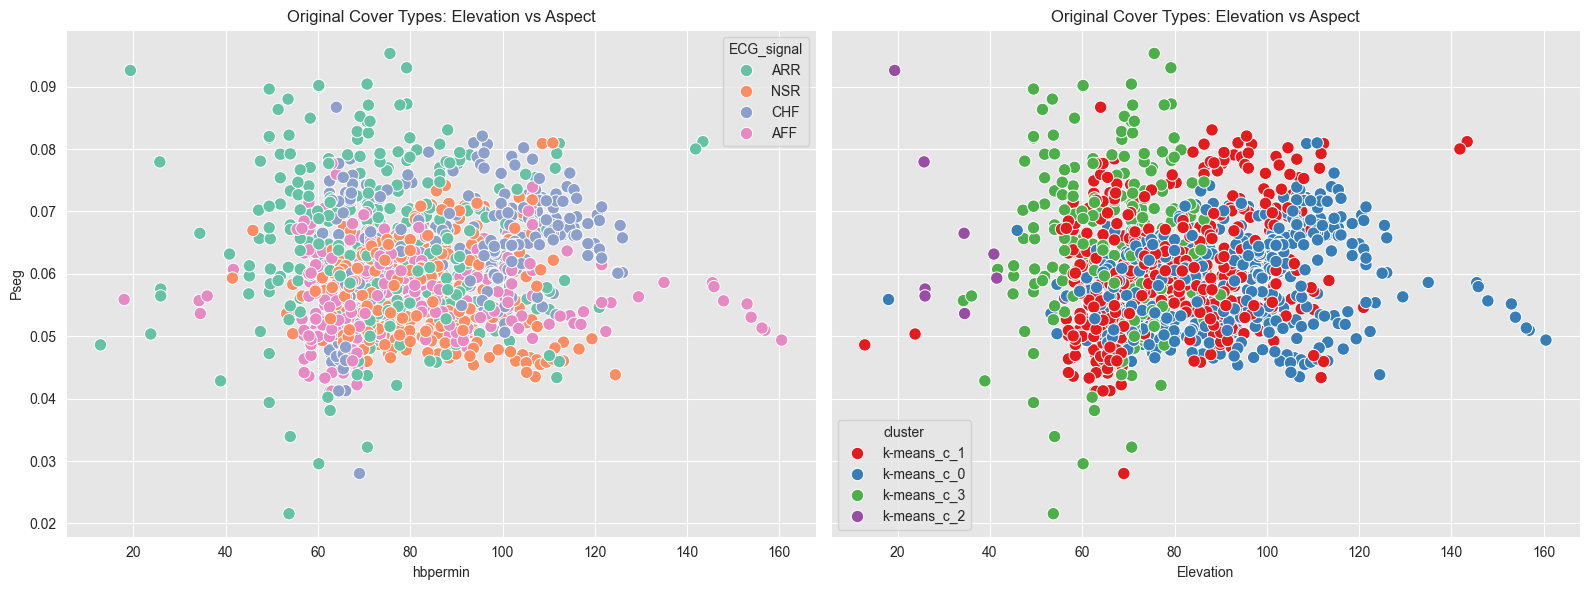

In [248]:
df['cluster'] = ['k-means_c_' + str(c) for c in cluster]
silhouette_avg = silhouette_score(X, df['cluster'])
ari = adjusted_rand_score(Y, cluster)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print(f"The average Silhouette Score: {silhouette_avg:.2f}")
print(f"Clustering Time: {elapsed_time:.4f} seconds")
print(f"Memory Used: {memory_diff:.2f} MB")

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.scatterplot(
    x=df['hbpermin'], y=df['Pseg'], hue=df['ECG_signal'],
    ax=axes[0], palette='Set2', s=80
)
axes[0].set(title='Original Cover Types: Elevation vs Aspect', xlabel='hbpermin', ylabel='Pseg')

sns.scatterplot(
    x=df['hbpermin'], y=df['Pseg'], hue=df['cluster'],
    ax=axes[1], palette='Set1', s=80
)
axes[1].set(title='Original Cover Types: Elevation vs Aspect', xlabel='Elevation', ylabel='Aspect')

plt.tight_layout()
plt.show()

LAPLACIAN METHODS

In [249]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse
from scipy import linalg


def spectral_clustering_analysis(df, Y, nn=8, n_clusters=4, random_state=25):
    start_time = time.time()
    mem_before = memory_usage()[0]  
    # Generate graph Laplacian
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    # Compute eigenvalues and eigenvectors
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
 
    # Project onto first few eigenvectors
    eigenvals_sorted_indices = np.argsort(eigenvals)
    indices = eigenvals_sorted_indices[:n_clusters]
    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])
    proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
    # Perform K-Means clustering
    k_means = KMeans(random_state=random_state, n_clusters=n_clusters)
    k_means.fit(proj_df)
    cluster = k_means.predict(proj_df)
    mem_after = memory_usage()[0]  # Memory after computations
    elapsed_time = time.time() - start_time
    return cluster, elapsed_time, mem_after - mem_before


cluster, elapsed_time, memory_diff = spectral_clustering_analysis(X, Y, nn=8, n_clusters=4, random_state=25)



    

Adjusted Rand Index (ARI): 0.59
The average Silhouette Score: 0.27
Clustering Time: 1.4772 seconds
Memory Used: 23.27 MB


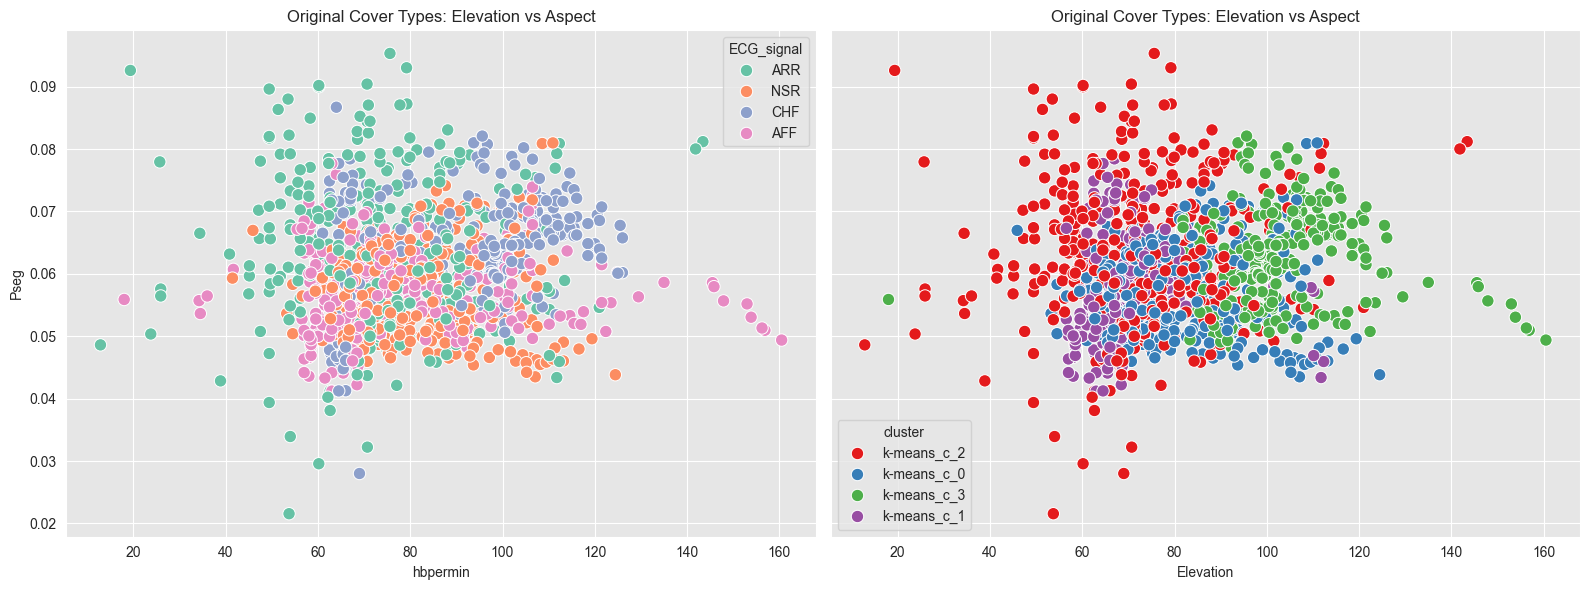

In [250]:
df['cluster'] = ['k-means_c_' + str(c) for c in cluster]
silhouette_avg = silhouette_score(X, df['cluster'])
ari = adjusted_rand_score(Y, cluster)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print(f"The average Silhouette Score: {silhouette_avg:.2f}")
print(f"Clustering Time: {elapsed_time:.4f} seconds")
print(f"Memory Used: {memory_diff:.2f} MB")

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.scatterplot(
    x=df['hbpermin'], y=df['Pseg'], hue=df['ECG_signal'],
    ax=axes[0], palette='Set2', s=80
)
axes[0].set(title='Original Cover Types: Elevation vs Aspect', xlabel='hbpermin', ylabel='Pseg')

sns.scatterplot(
    x=df['hbpermin'], y=df['Pseg'], hue=df['cluster'],
    ax=axes[1], palette='Set1', s=80
)
axes[1].set(title='Original Cover Types: Elevation vs Aspect', xlabel='Elevation', ylabel='Aspect')

plt.tight_layout()
plt.show()

In [251]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse
from scipy import linalg

def spectral_clustering_analysis(df, Y, nn=15, n_clusters=7, random_state=25):
    start_time = time.time()
    mem_before = memory_usage()[0]  
    # Generate graph Laplacian
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=True)
    graph_laplacian = graph_laplacian_s.toarray()
    # Compute eigenvalues and eigenvectors
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    # Project onto first few eigenvectors
    eigenvals_sorted_indices = np.argsort(eigenvals)
    indices = eigenvals_sorted_indices[:n_clusters]
    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])
    proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
    # Perform K-Means clustering
    k_means = KMeans(random_state=random_state, n_clusters=n_clusters)
    k_means.fit(proj_df)
    cluster = k_means.predict(proj_df)
    mem_after = memory_usage()[0]  # Memory after computations
    elapsed_time = time.time() - start_time
    return cluster, elapsed_time, mem_after - mem_before


cluster, elapsed_time, memory_diff = spectral_clustering_analysis(X, Y, nn=8, n_clusters=4, random_state=25)



    

Adjusted Rand Index (ARI): 0.68
The average Silhouette Score: 0.31
Clustering Time: 1.4159 seconds
Memory Used: 22.21 MB


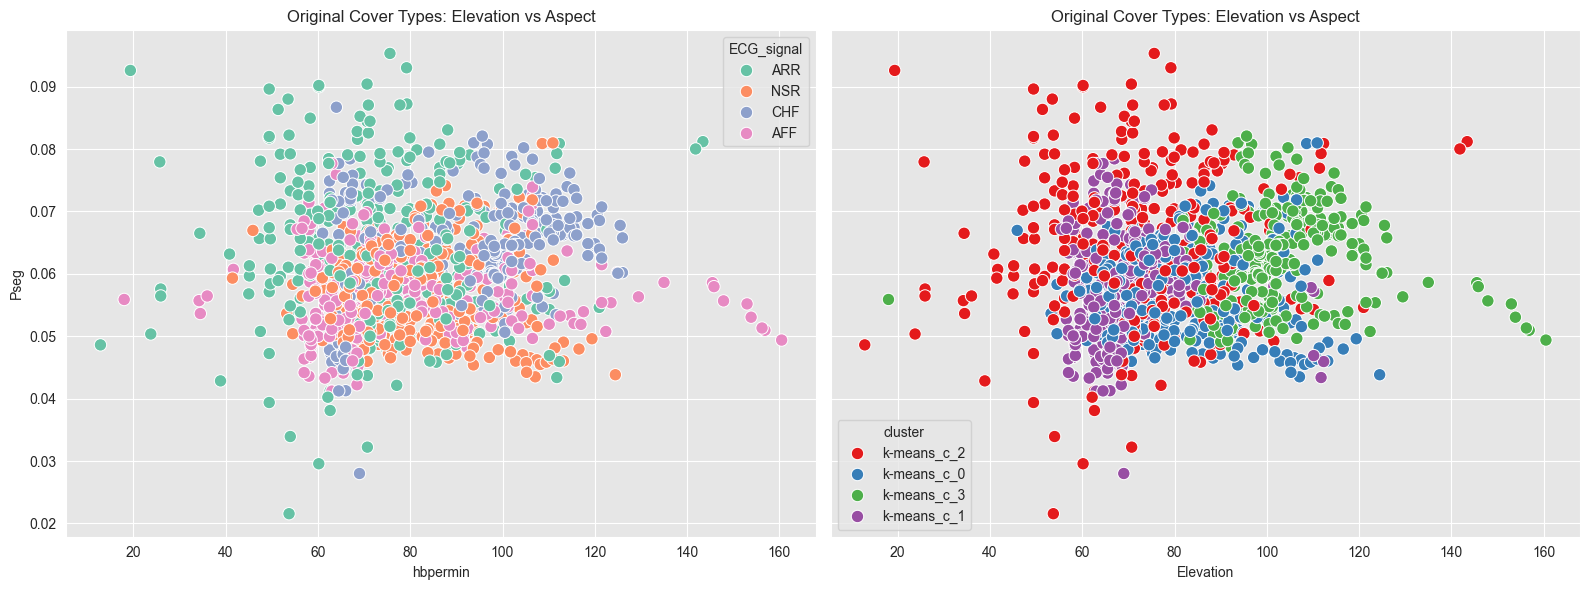

In [252]:
df['cluster'] = ['k-means_c_' + str(c) for c in cluster]
silhouette_avg = silhouette_score(X, df['cluster'])
ari = adjusted_rand_score(Y, cluster)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print(f"The average Silhouette Score: {silhouette_avg:.2f}")
print(f"Clustering Time: {elapsed_time:.4f} seconds")
print(f"Memory Used: {memory_diff:.2f} MB")

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.scatterplot(
    x=df['hbpermin'], y=df['Pseg'], hue=df['ECG_signal'],
    ax=axes[0], palette='Set2', s=80
)
axes[0].set(title='Original Cover Types: Elevation vs Aspect', xlabel='hbpermin', ylabel='Pseg')

sns.scatterplot(
    x=df['hbpermin'], y=df['Pseg'], hue=df['cluster'],
    ax=axes[1], palette='Set1', s=80
)
axes[1].set(title='Original Cover Types: Elevation vs Aspect', xlabel='Elevation', ylabel='Aspect')

plt.tight_layout()
plt.show()